# Chapter 9 - Navigation Lights

As you may have noticed in the preceeding chapters, our Physics::Navigation Buoys classes are each set up with suitable flashing light sequences.

First, the usual preamble... and let's predefine some navigation buoy objects:

In [1]:
use Physics::Navigation;
use Physics::Measure;
use Math::Polygons;

my $pos-A = Position.new( ♓️<51.5072°N>, ♓️<0.1193°W> );  say "$pos-A";
my $pos-B = Position.new( ♓️<51.5054°N>, ♓️<0.1276°W> );  say "$pos-B";
my $pos-C = Position.new( ♓️<51.5054°N>, ♓️<0.1110°W> );  say "$pos-C";
my $pos-D = Position.new( ♓️<51.5036°N>, ♓️<0.1276°W> );  say "$pos-D";

$IALA = A;    say "IALA: $IALA";

## Disclaimer

As with the other Chapters, this jupyter notebook is provided for illustrative purposes and it does NOT seek to be a definitive guide. It only covers a subset of the IALA standards as described on [Wikipedia](https://en.wikipedia.org/wiki/International_Association_of_Marine_Aids_to_Navigation_and_Lighthouse_Authorities#IALA_sea_mark_regions). 

DO NOT RELY ON THIS INFORMATION FOR REAL NAVIGATION PURPOSES.

Sadly the Math::Polygons module does not include a Circle class. We need an animated one to display our flashing light examples. Luckily we can make our own.

Did I say Animated, oh we also need to make a role for that! 

In [2]:
role Animated {
    has @.pattern  = <#800 #f00 #800 #800>;
    has $.duration = 2;
    
    method animate {
        animate => [ attributeName => "fill",   values => @!pattern.join(';'),
                     dur => ($!duration ~ "s"), repeatCount => "indefinite" ];
    }
}

(Animated)

The ```does``` keyword brings our Animated role into play. We are using ```does Element does Styled``` to bring in the other behaviours we need to draw and format our Circles.

In [3]:
class Circle does Element does Styled does Animated {
    has Point $.centre;
    has       $.radius;

    method serialize {
        circle => [ cx => $!centre.x, cy => $!centre.y, r => $!radius, 
                      self.animate, |self.styles ];
    }
}

(Circle)

In [4]:
my $circle = Circle.new(
    centre => Point.new(80, 380),
    radius => 30
);

my $rectangle = Rectangle.new( 
    origin => Point.new(20, 20),
    width  => 120, 
    height => 80  
);

my $square = Square.new( 
    origin => Point.new(170, 20),
    side   => 100 
);

my \A = Point.new( 20, 260);
my \B = Point.new( 30, 200);
my \C = Point.new(120, 145);
my \D = Point.new(125, 250);
my $quadrilateral = Quadrilateral.new(
    A, B, C, D,  
);

my $triangle = Triangle.new(
    fill => "green",
    stroke => "black",
    apex => Point.new(220, 160),
    side => 100 
);

Math::Polygons::Triangle.new(apex => Math::Polygons::Point.new(x => 220, y => 160), side => 100, points => Array[Math::Polygons::Point].new(), fill => "green", stroke => "black", stroke-width => 3)

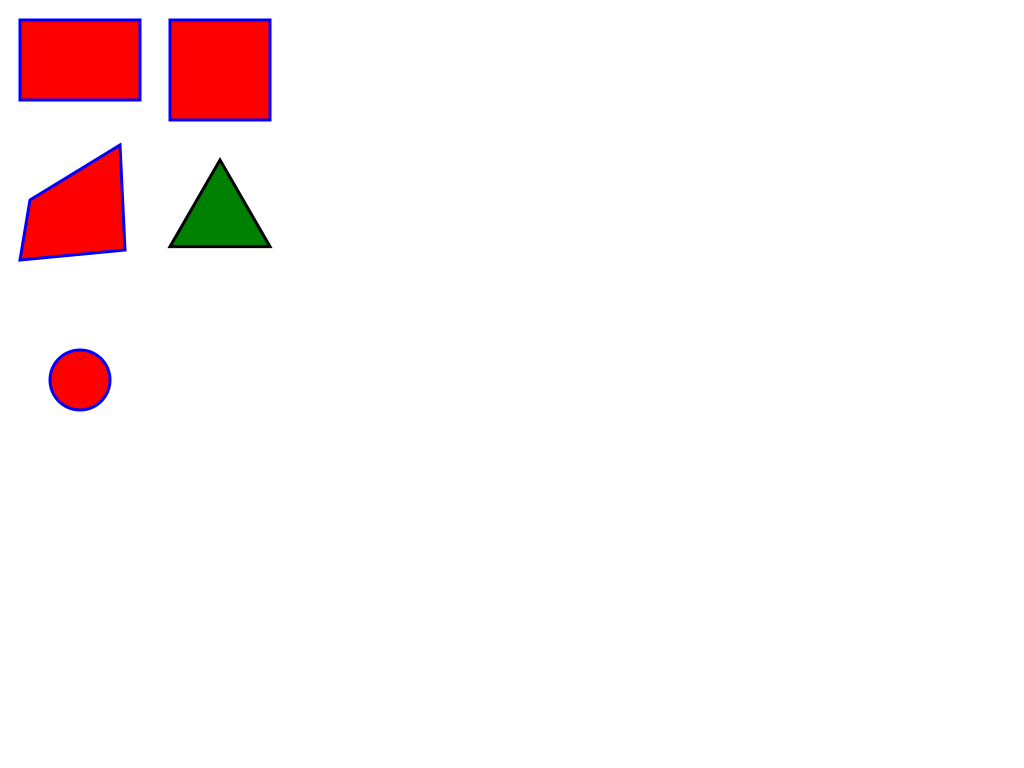

In [5]:
my $drawing = Drawing.new( 
    elements => [
        $circle,
        $rectangle, 
        $square,
        $quadrilateral,
        $triangle,
    ],
);
$drawing.serialize.say;

In [ ]:
<svg width="320" height="320" viewBox="0 0 320 320">
<circle fill="none" stroke="#000" stroke-width="4" cx="50" cy="50" r="48" stroke-dasharray="360" stroke-linecap="round" transform="rotate(-90 ) translate(-100 0)" >
        <animate attributeName="fill" values="#800;#f00;#800;#800" dur="2s" repeatCount="indefinite"></animate>
</circle>
</svg>